In [388]:
# put all RGB values into a 2D array 
# loop through array?
# use array to create map of greenness, snow, or whatever Paul wants
# use im.getdata?

In [651]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import glob
import math

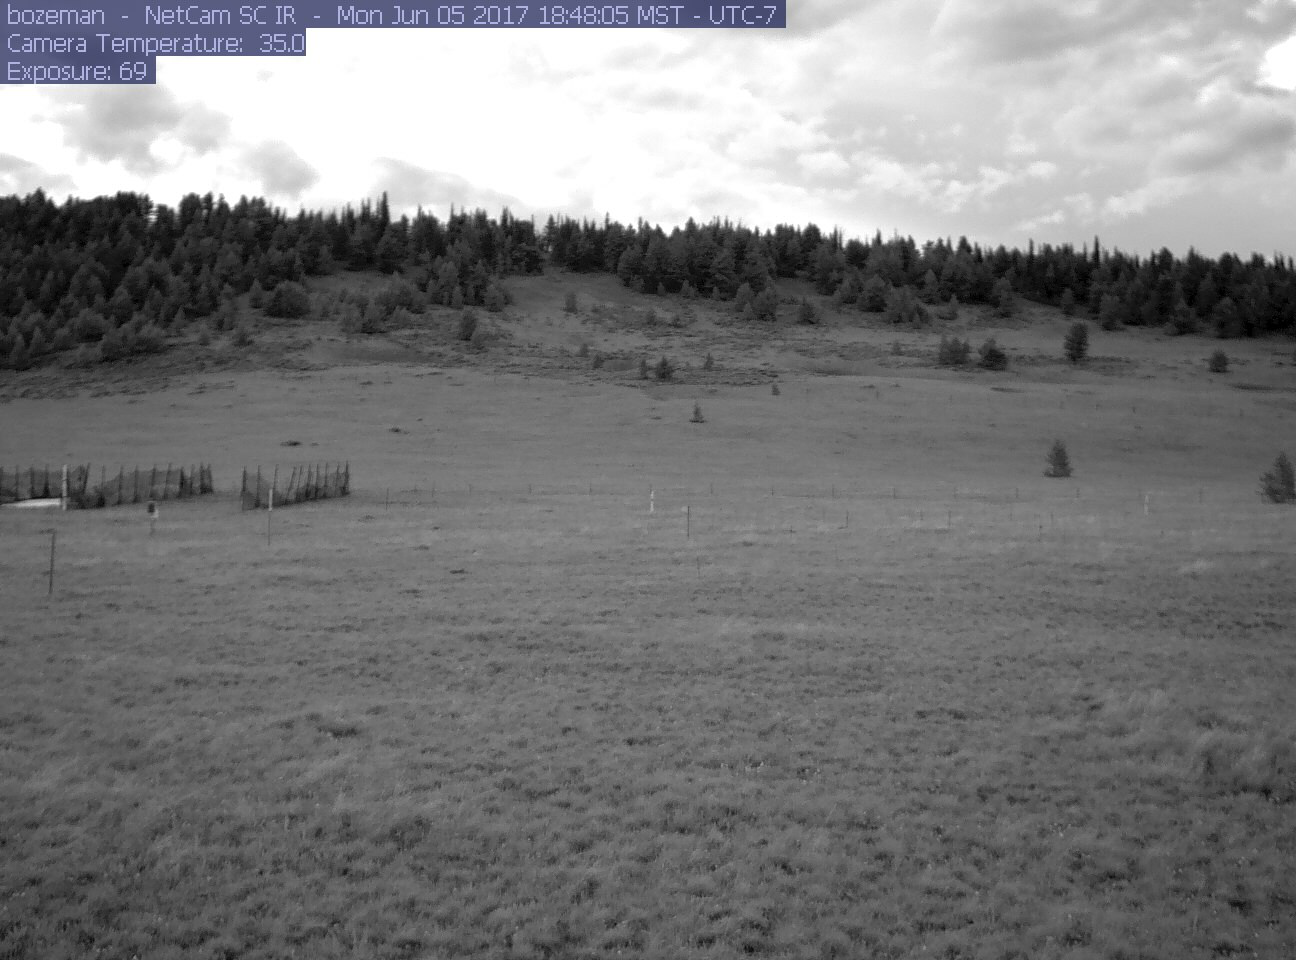

In [654]:
# shows IR photo

ir_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_05_184805.jpg'
response = requests.get(ir_test_photo)
IR_img = Image.open(BytesIO(response.content))
IR_img

In [511]:
photos

[[], [], [], []]

In [512]:
photo = requests.get('https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/')

In [513]:
photo

<Response [403]>

In [517]:
# crops photo

width = IR_img.size[0]
height = IR_img.size[1]
chop_IR_img = IR_img.crop(
    (
        width - 1296,
        height - 425,
        width,
        height
    )
)
#chop_IR_img

In [628]:
# finds all pixel values for IR image

width, height = chop_IR_img.size
IR_pixel_values = list(chop_IR_img.getdata())
IR_pixel_values = numpy.array(IR_pixel_values).reshape((width, height, 3))

In [423]:
# averages all IR pixel data (returns a single number)

x = (np.average(IR_pixel_values, axis=0))
y = np.average(x, axis=0)
IR_ave = np.average(y, axis=0)

In [626]:
#break

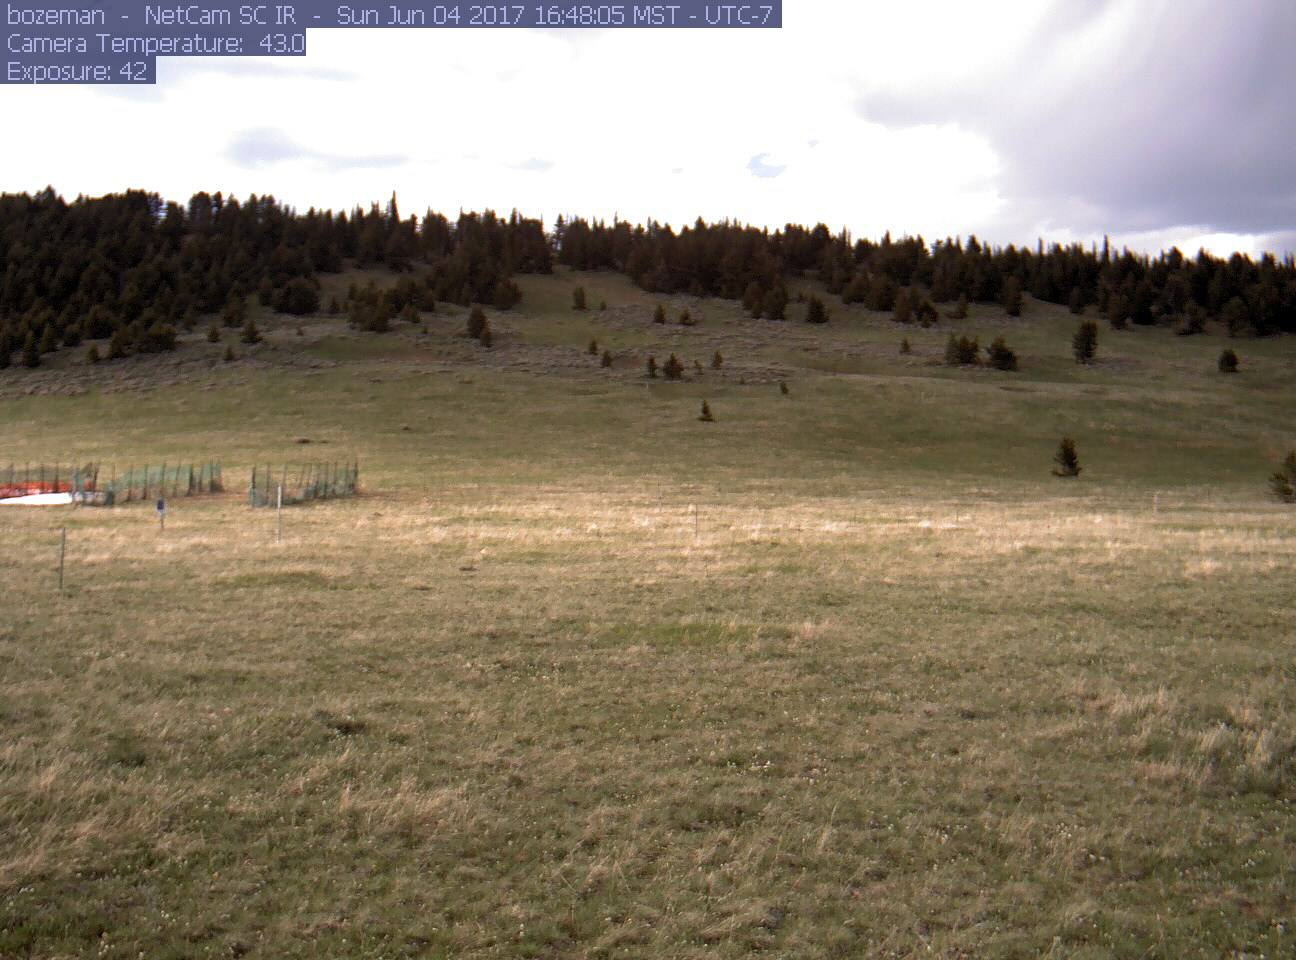

In [648]:
# shows visual photo

vis_test_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_04_164805.jpg'
response = requests.get(vis_test_photo)
VIS_img = Image.open(BytesIO(response.content))
VIS_img

In [635]:
# crops photo

width = VIS_img.size[0]
height = VIS_img.size[1]
chop_vis_img = VIS_img.crop(
    (
        width - 1296,
        height - 425,
        width,
        height
    )
)
#chop_vis_img

In [614]:
# finds all pixel values for visual image

width, height = chop_vis_img.size
vis_pixel_values = list(chop_vis_img.getdata())
vis_pixel_values = numpy.array(vis_pixel_values).reshape((width, height, 3))
#vis_pixel_values

In [615]:
# averages all visual pixel data (returns red average)
x = (np.average(vis_pixel_values, axis=0))
r_ave = np.average(x, axis=0)
red_ave = r_ave.item(0)
red_ave

122.79428467683366

In [616]:
# averages all visual pixel data (returns green average)

x = (np.average(vis_pixel_values, axis=1))
g_ave = np.average(x, axis=1)
green_ave = g_ave.item(1)
green_ave

174.9827450980392

In [617]:
# averages all viusal pixel data (returns blue average)

x = (np.average(vis_pixel_values, axis = 2))
b_ave = np.average(x, axis = 1)
blue_ave = b_ave.item(2)
blue_ave

166.26039215686276

In [618]:
#break

In [638]:
# calculates average NDVI?

ndvi = (IR_ave - red_ave)/(IR_ave + red_ave)


In [637]:
# calculates green chromatic coodinate

gcc = green_ave/(red_ave+blue_ave+green_ave)

In [636]:
# calculates excess green

eg = 2*green_ave-(red_ave+blue_ave)

In [698]:
# calculating all red values 

x=0
y=0
width,height = VIS_img.size
while y < height:
    while x < width:
        red_array = vis_pixel_values[z,0,0]
        x+1
        y+1

KeyboardInterrupt: 

In [ ]:
# finding r'
r_prime = red_array/math.sqrt(42)
r_prime

In [ ]:
# calculating all IR values

x=0
y=0
width,height = IR_pixel_values.size
while x < width:
    while y < height:
        IR_array = IR_pixel_values[0,0,0]
        x+1
        y+1
IR_array

In [ ]:
# finding z'
z_prime = IR_array/math.sqrt(69)